In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [2]:
iris_df = pd.read_csv ('small_iris.csv')

**Skriv en egen K-Means**

In [3]:
def create_centroids(iris_df,k):
    centroids = []
    for i in range(k):
        centroid = iris_df.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis= 1)

def get_labels(df, centroids):
    distances = centroids.apply(lambda x:np.sqrt(((iris_df - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

def new_centroids(iris_df, labels, k):
    return iris_df.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

def plot_clusters(iris_df, labels, centriods, iteration):
    pca = PCA (n_components= 2)
    iris_2d = pca.fit_transform(iris_df)
    centriods_2d = pca.transform (centroids.T)
    clear_output (wait = True)
    plt.title (f'Iteration {iteration}')
    plt.scatter(x = iris_2d[:,0], y =iris_2d[:,1], c= labels)
    plt.scatter(x=centriods_2d[:, 0], y=centriods_2d [:,1])
    plt.show()

**Analysera datan**

In [4]:
iris_df.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [5]:
iris_df.tail()

,sepal length (cm),petal length (cm)
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4
149,5.9,5.1


In [6]:
iris_df.describe()

,sepal length (cm),petal length (cm)
count,150.000000,150.000000
mean,5.843333,3.758000
std,0.828066,1.765298
min,4.300000,1.000000
25%,5.100000,1.600000
50%,5.800000,4.350000
75%,6.400000,5.100000
max,7.900000,6.900000


In [7]:
iris_df.shape

(150, 2)

In [8]:
null_values =  iris_df.isnull()
null_true = null_values.sum().sum()
null_false = null_values.size - null_true
list_of_null = f"{null_true} True and {null_false} False"
print (list_of_null)

0 True and 300 False


In [9]:
dupe= iris_df.duplicated()
dupe_true = dupe.sum().sum()
dupe_false = dupe.size - dupe_true
list_of_dupe = f"{dupe_true} Dupes and {dupe_false} Non Dupes"
print (list_of_dupe)

27 Dupes and 123 Non Dupes


Finns 27 dupes. 

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'petal length (cm)'}>]], dtype=object)

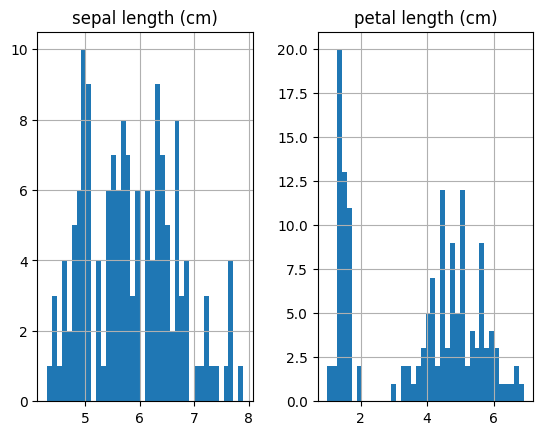

In [10]:
iris_df.hist (bins=40)

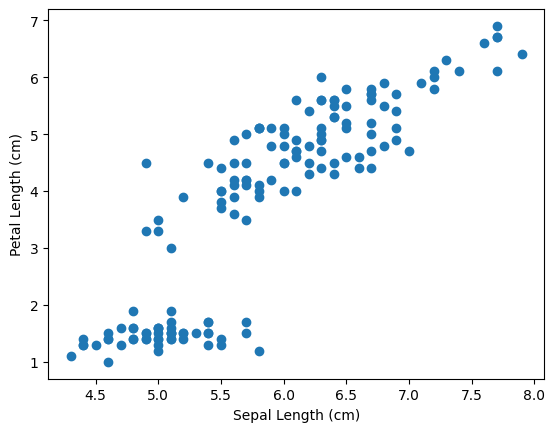

In [11]:
plt.scatter(iris_df['sepal length (cm)'].values,iris_df['petal length (cm)'].values)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

In [12]:
iris_df.nunique()

sepal length (cm)    35
petal length (cm)    43
dtype: int64

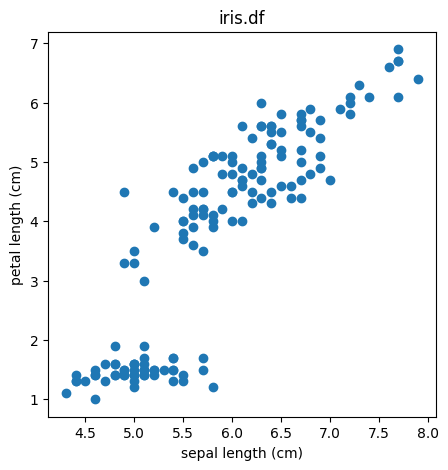

In [13]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(iris_df['sepal length (cm)'], iris_df['petal length (cm)'])


ax.set_title('iris.df')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('petal length (cm)')


plt.show()

*Finns det några konstiga värden?*
svar. Det finns dubletter i iris_df. Det finns inga nullvärden.

*Ska några attribut plockas bort?*
Svar: inga attributs behövs ta bort för det här dataset. 

*behövs datan normalisering?*
svar: Ja, vi behöver ta bort dubletterna. 

In [14]:
iris_df.drop_duplicates()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [15]:
dupe= iris_df.duplicated()
dupe_true = dupe.sum().sum()
dupe_false = dupe.size - dupe_true
list_of_dupe = f"{dupe_true} Dupes and {dupe_false} Non Dupes"
print (list_of_dupe)

27 Dupes and 123 Non Dupes


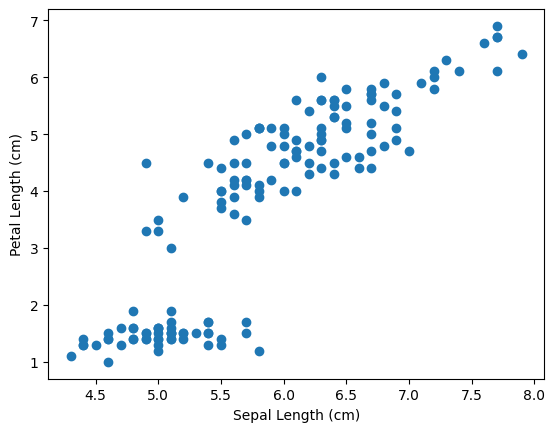

In [16]:
plt.scatter(iris_df['sepal length (cm)'].values,iris_df['petal length (cm)'].values)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

In [31]:
centroids

,0,3,4,5,6,7
sepal length (cm),6.119906,7.470526,6.571414,5.513436,5.174197,4.597080
petal length (cm),4.717504,6.290816,5.410662,3.901248,1.491626,1.362753


**Träna din KMEANS, prova att använda olika värden på K**

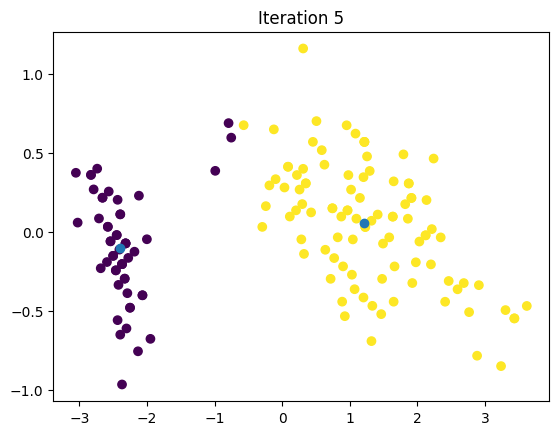

In [25]:
max_iter = 100
k = 3
centroids = create_centroids(iris_df,k)
old_centroids = pd.DataFrame()
iteration = 1
while iteration < max_iter and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(iris_df, centroids)
    centroids = new_centroids(iris_df, labels, k)
    plot_clusters (iris_df, labels, centroids, iteration)
    iteration +=1

In [26]:
centroids

,0,2
sepal length (cm),4.994152,6.270029
petal length (cm),1.518072,4.898764


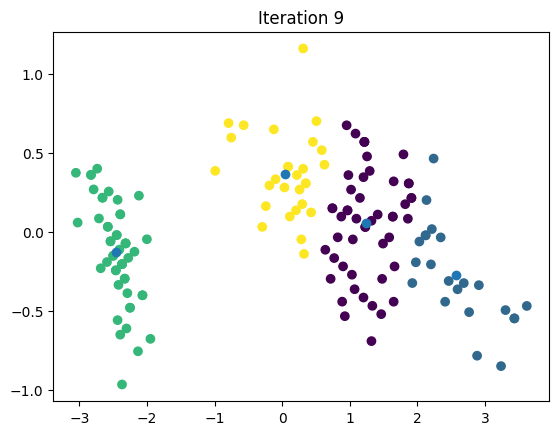

In [27]:
max_iter = 100
k = 5
centroids = create_centroids(iris_df,k)
old_centroids = pd.DataFrame()
iteration = 1
while iteration < max_iter and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(iris_df, centroids)
    centroids = new_centroids(iris_df, labels, k)
    plot_clusters (iris_df, labels, centroids, iteration)
    iteration +=1

In [28]:
centroids

,1,2,3,4
sepal length (cm),6.283868,7.108774,4.993841,5.523065
petal length (cm),4.926270,6.018607,1.451734,3.941239


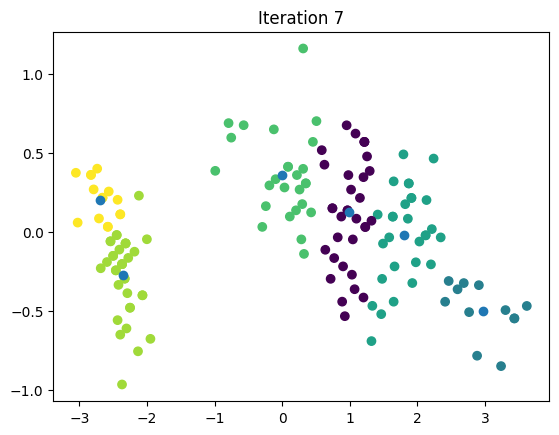

In [29]:
max_iter = 100
k = 8
centroids = create_centroids(iris_df,k)
old_centroids = pd.DataFrame()
iteration = 1
while iteration < max_iter and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(iris_df, centroids)
    centroids = new_centroids(iris_df, labels, k)
    plot_clusters (iris_df, labels, centroids, iteration)
    iteration +=1

In [30]:
centroids

,0,3,4,5,6,7
sepal length (cm),6.119906,7.470526,6.571414,5.513436,5.174197,4.597080
petal length (cm),4.717504,6.290816,5.410662,3.901248,1.491626,1.362753
